In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Stores.csv')

In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [5]:
df.shape

(896, 5)

In [6]:
df['Store_Sales'].idxmax()

649

In [7]:
df.iloc[648]

Store ID                  649
Store_Area               1514
Items_Available          1794
Daily_Customer_Count     1400
Store_Sales             54820
Name: 648, dtype: int64

In [8]:
df["Store_Sales"].idxmin()

31

In [9]:
df = df.drop('Store ID ', axis = 'columns')

In [10]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [13]:
df.info

<bound method DataFrame.info of      Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1659             1961                   530        66490
1          1461             1752                   210        39820
2          1340             1609                   720        54010
3          1451             1748                   620        53730
4          1770             2111                   450        46620
..          ...              ...                   ...          ...
891        1582             1910                  1080        66390
892        1387             1663                   850        82080
893        1200             1436                  1060        76440
894        1299             1560                   770        96610
895        1174             1429                  1110        54340

[896 rows x 4 columns]>

In [14]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [15]:
df.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

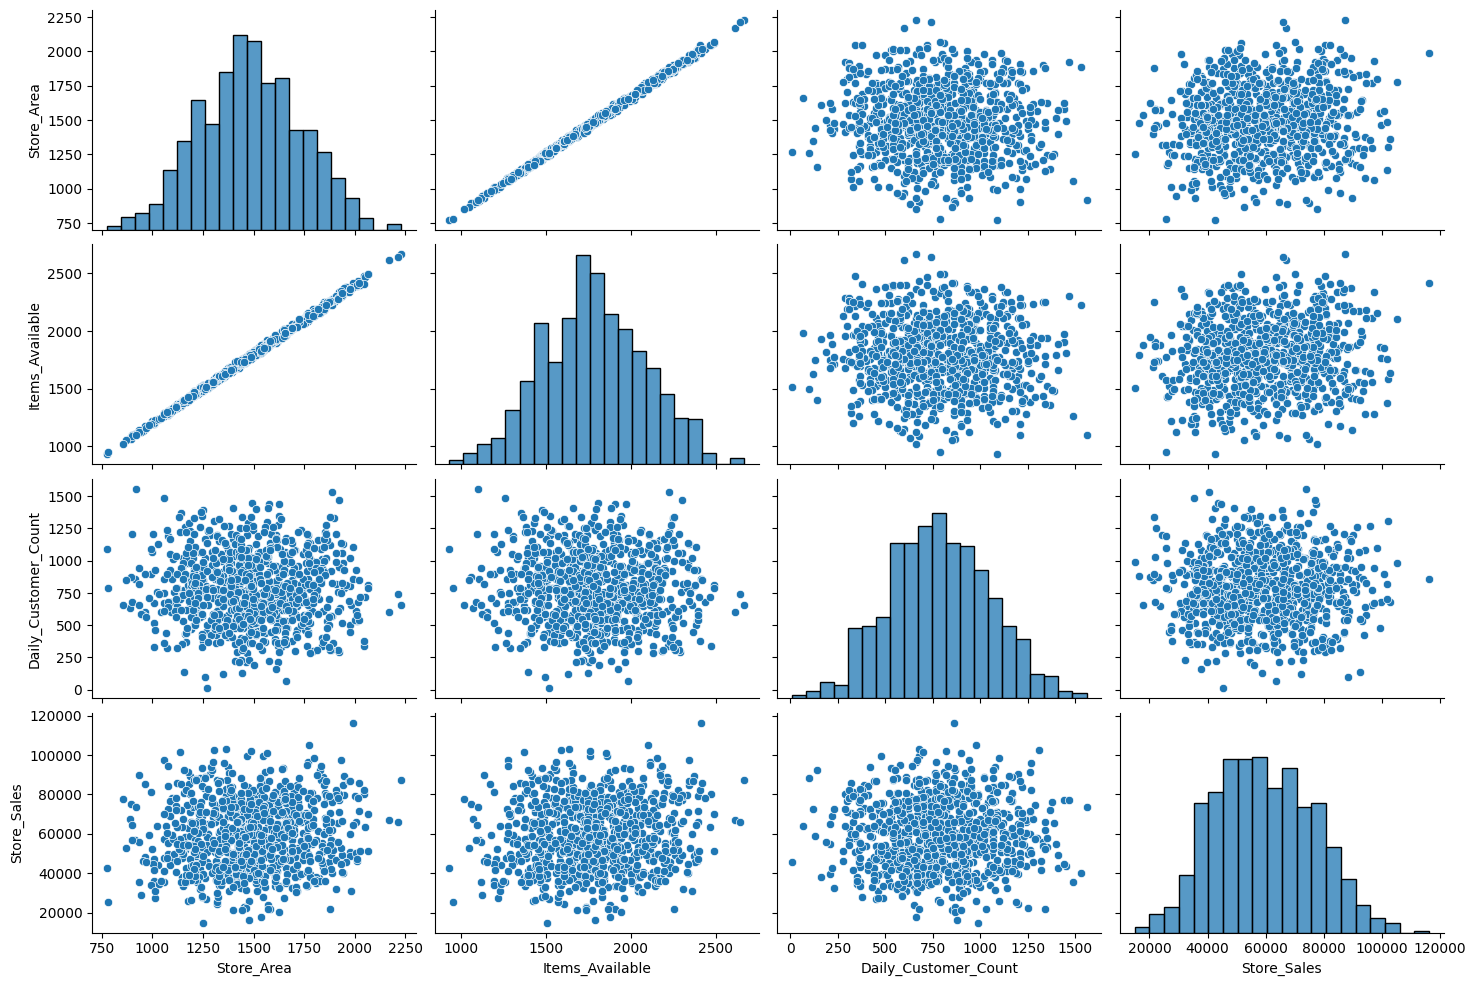

In [16]:
import matplotlib.pyplot as plt
sns.pairplot(df,aspect = 1.5)
plt.show()

<Figure size 4000x2000 with 0 Axes>

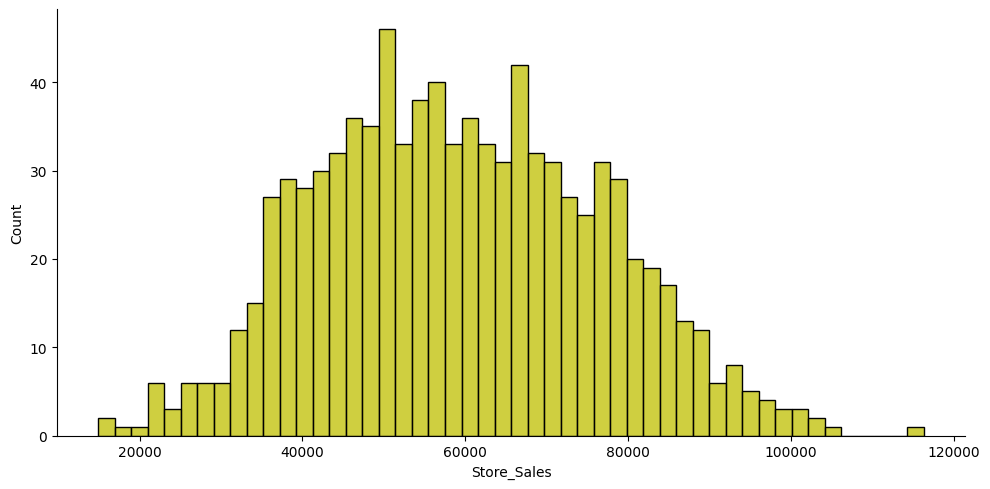

In [17]:
plt.figure(figsize = (20,10),dpi = 200)
sns.displot(data = df,x = "Store_Sales",bins = 50,color = 'y',aspect = 2)

In [18]:
#Feature engineering


In [19]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [20]:
IQRDailyCustomerCount = 970 - 600
upperlim = 970+ 1.5 * IQRDailyCustomerCount
lowerlim = 600 -1.5 * IQRDailyCustomerCount
df.loc[df['Daily_Customer_Count']>upperlim] = np.nan
df.loc[df['Daily_Customer_Count']<lowerlim] = np.nan

In [21]:
df = df.dropna()

In [22]:
X = df[['Store_Area',"Items_Available",'Daily_Customer_Count']]
y = df['Store_Sales']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train,y_test = train_test_split(X,y,random_state = 100,test_size = 0.3)

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
def modelresults(predictions):
    print('Mean absoluted error on model is {}'.format(mean_absolute_error(y_test,predictions)))
    print('Root mean squared error on model is {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train,y_train)
predictionslr = lr.predict(scaled_X_test)
modelresults(predictionslr)

Mean absoluted error on model is 14349.998699736743
Root mean squared error on model is 17337.59686115813


In [28]:
from sklearn.svm import SVR 
svr = SVR()
svr.fit(scaled_X_train , y_train)
predictionssvr = svr.predict(scaled_X_test)
modelresults(predictionssvr)

Mean absoluted error on model is 14433.737586533161
Root mean squared error on model is 17436.674858511513


In [30]:
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {'C':[0.001,0.01,0.1,0.5],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
print('Best parameters for model is {}'.format(gridsvr.best_params_))

Best parameters for model is {'C': 0.5, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}


In [32]:
predsgridsvr = gridsvr.predict(scaled_X_test)
modelresults(predsgridsvr)

Mean absoluted error on model is 14337.852864100898
Root mean squared error on model is 17335.780623165763


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(scaled_X_train,y_train)
predsrfr = rfr.predict(scaled_X_test)
modelresults(predsrfr)

Mean absoluted error on model is 15616.970149253732
Root mean squared error on model is 19150.112558758876


In [36]:
rfrmodel = RandomForestRegressor()
param_gridrfr = {'bootstrap':[True],'max_depth':[5,10,15],'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6]}
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(scaled_X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [41]:
print('Best parameters for model is {}'.format(gridrfr.best_params_))

Best parameters for model is {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 5}


In [42]:
predsgridrfr = gridrfr.predict(scaled_X_test)

In [43]:
modelresults(predsgridrfr)

Mean absoluted error on model is 14513.252023137686
Root mean squared error on model is 17749.669373379762
